<a href="https://www.kaggle.com/code/drskprabhakar/contact-lens-no-contact-lens-cnn-model?scriptVersionId=172091501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import numpy as np


In [2]:
os.listdir('/kaggle/input/contact-lens-no-contact-lens-split-image-dataset/split')

['val', 'test', 'train']

In [3]:
os.listdir('/kaggle/input/contact-lens-no-contact-lens-split-image-dataset/split/train')

['Contact lens', 'No contact lens']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/kaggle/input/contact-lens-no-contact-lens-split-image-dataset/split/train',
                                          target_size=(64,64),
                                          class_mode='binary')
                                                       
valimages = datagen.flow_from_directory('/kaggle/input/contact-lens-no-contact-lens-split-image-dataset/split/val',
                                          target_size=(64,64),
                                       class_mode='binary')
testimages = datagen.flow_from_directory('/kaggle/input/contact-lens-no-contact-lens-split-image-dataset/split/test',
                                          target_size=(64,64),
                                        class_mode='binary')

2024-04-15 08:07:24.040975: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 08:07:24.041123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 08:07:24.209430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 38 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64, 64, 3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(trainimages,
          batch_size=32,
          epochs=6,
          validation_data=valimages)
model.save('binucnn_model.keras')

Epoch 1/6


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step - accuracy: 0.5175 - loss: 0.6836 - val_accuracy: 0.5000 - val_loss: 0.6743
Epoch 2/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5380 - loss: 0.6804 - val_accuracy: 0.7500 - val_loss: 0.5907
Epoch 3/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9090 - loss: 0.5603 - val_accuracy: 0.5000 - val_loss: 0.6851
Epoch 4/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6645 - loss: 0.4700 - val_accuracy: 0.7500 - val_loss: 0.4809
Epoch 5/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8743 - loss: 0.4254 - val_accuracy: 0.7500 - val_loss: 0.4767
Epoch 6/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8363 - loss: 0.4660 - val_accuracy: 1.0000 - val_loss: 0.3454


In [7]:
y_pred = model.predict(testimages)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [8]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [9]:
y_true = testimages.classes

In [10]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[2, 1],
       [2, 1]])

In [11]:
print(metrics.classification_report(y_true, y_pred,
                                   target_names=['contact lens',
                                                'no_contactlens']))

                precision    recall  f1-score   support

  contact lens       0.50      0.67      0.57         3
no_contactlens       0.50      0.33      0.40         3

      accuracy                           0.50         6
     macro avg       0.50      0.50      0.49         6
  weighted avg       0.50      0.50      0.49         6



In [12]:
testimages.class_indices

{'Contact lens': 0, 'No contact lens': 1}

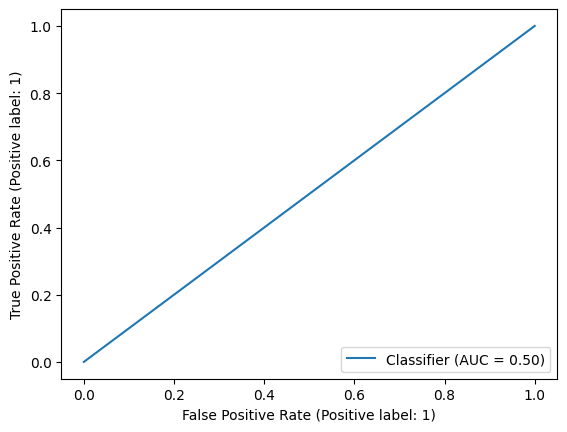

In [13]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

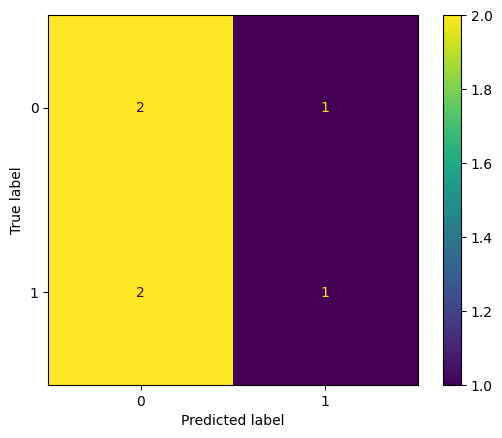

In [14]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

Thank you